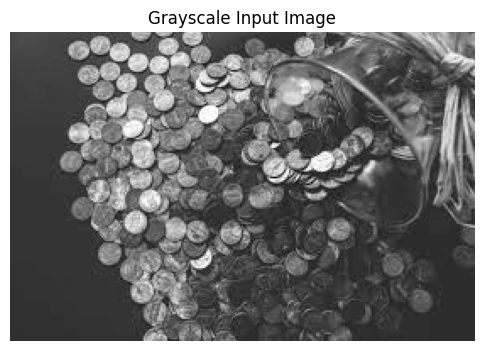

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("D:\\Academic\\Semester\\Digital Image Lab\\Coin.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(6, 6))
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Input Image')
plt.axis('off')
plt.show()


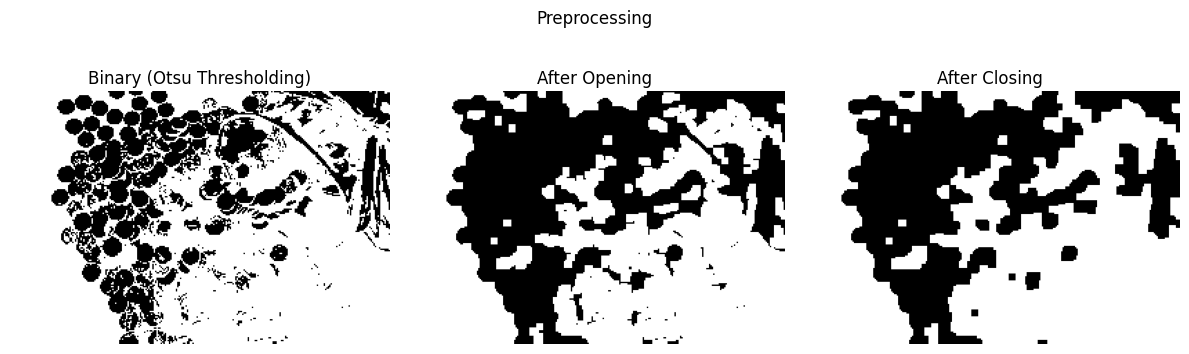

In [4]:

_, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
kernel = np.ones((3, 3), np.uint8)
opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(binary, cmap='gray')
plt.title('Binary (Otsu Thresholding)')
plt.axis('off')
plt.subplot(1, 3, 2)
plt.imshow(opening, cmap='gray')
plt.title('After Opening')
plt.axis('off')
plt.subplot(1, 3, 3)
plt.imshow(closing, cmap='gray')
plt.title('After Closing')
plt.axis('off')
plt.suptitle('Preprocessing')
plt.tight_layout()
plt.show()


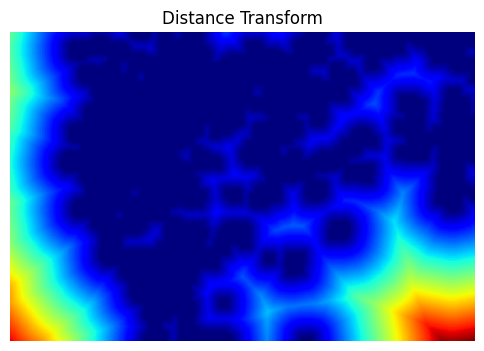

In [12]:
# Distance transform
dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
dist_display = cv2.normalize(dist_transform, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
plt.figure(figsize=(6, 6))
plt.imshow(dist_display, cmap='jet')
plt.title('Distance Transform')
plt.axis('off')
plt.show()


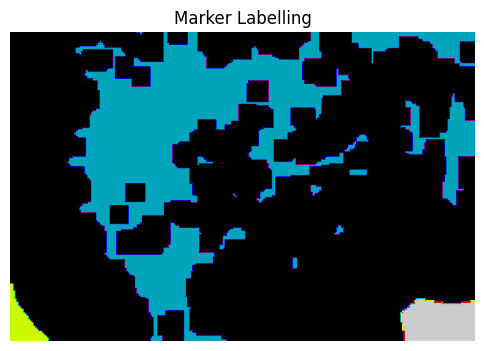

In [7]:

_, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
sure_fg = np.uint8(sure_fg)
sure_bg = cv2.dilate(closing, kernel, iterations=3)
unknown = cv2.subtract(sure_bg, sure_fg)
ret, markers = cv2.connectedComponents(sure_fg)
markers = markers + 1 
markers[unknown == 255] = 0
label_display = cv2.normalize(markers.astype(np.float32), None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

plt.figure(figsize=(6, 6))
plt.imshow(label_display, cmap='nipy_spectral')
plt.title('Marker Labelling')
plt.axis('off')
plt.show()


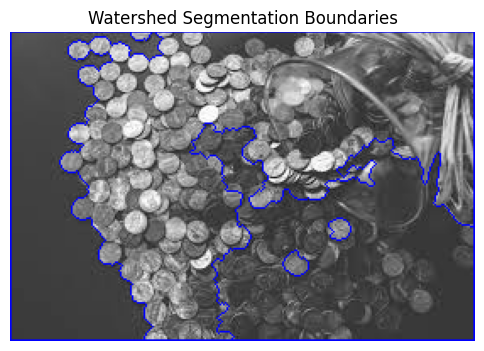

In [9]:
img_watershed = img.copy()
markers_ws = cv2.watershed(img_watershed, markers)
img_watershed[markers_ws == -1] = [255, 0, 0]
plt.figure(figsize=(6, 6))
plt.imshow(cv2.cvtColor(img_watershed, cv2.COLOR_BGR2RGB))
plt.title('Watershed Segmentation Boundaries')
plt.axis('off')
plt.show()


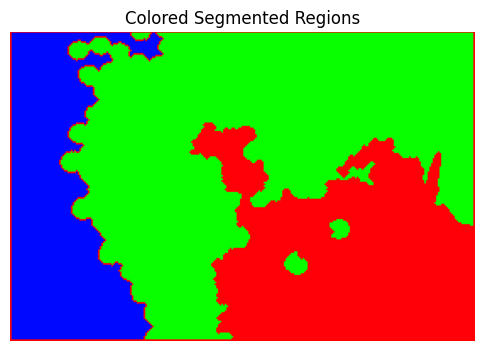

In [11]:

label_hue = np.uint8(179 * markers_ws / np.max(markers_ws))
blank_ch = 255 * np.ones_like(label_hue)
colored_markers = cv2.merge([label_hue, blank_ch, blank_ch])
colored_markers = cv2.cvtColor(colored_markers, cv2.COLOR_HSV2RGB)
colored_markers[label_hue == 0] = 0
colored_markers[markers_ws == -1] = [255, 0, 0]  # Red for boundaries
plt.figure(figsize=(6, 6))
plt.imshow(colored_markers)
plt.title('Colored Segmented Regions')
plt.axis('off')
plt.show()


In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread("D:\\Academic\\Semester\\Digital Image Lab\\Coin.jpeg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
def watershed_segmentation(gray_img, use_blur=False, kernel_size=3):
    if use_blur:
        gray_img = cv2.GaussianBlur(gray_img, (5,5), 0)
    _, binary = cv2.threshold(gray_img, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opening = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=2)
    closing = cv2.morphologyEx(opening, cv2.MORPH_CLOSE, kernel, iterations=2)
    dist_transform = cv2.distanceTransform(closing, cv2.DIST_L2, 5)
    _, sure_fg = cv2.threshold(dist_transform, 0.7*dist_transform.max(), 255, 0)
    sure_fg = np.uint8(sure_fg)
    sure_bg = cv2.dilate(closing, kernel, iterations=3)
    unknown = cv2.subtract(sure_bg, sure_fg)
    ret, markers = cv2.connectedComponents(sure_fg)
    markers = markers + 1
    markers[unknown == 255] = 0
    img_copy = img.copy()
    markers_ws = cv2.watershed(img_copy, markers)
    return markers_ws

def color_segmented_image(markers_ws):
    label_hue = np.uint8(179 * markers_ws / np.max(markers_ws))
    blank_ch = 255 * np.ones_like(label_hue)
    hsv = cv2.merge([label_hue, blank_ch, blank_ch])
    rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2RGB)
    rgb[label_hue == 0] = 0
    rgb[markers_ws == -1] = [255, 0, 0]
    return rgb


In [8]:
markers_A = watershed_segmentation(gray, use_blur=False, kernel_size=3)
markers_B = watershed_segmentation(gray, use_blur=True, kernel_size=3)
markers_C = watershed_segmentation(gray, use_blur=False, kernel_size=5)

colored_A = color_segmented_image(markers_A)
colored_B = color_segmented_image(markers_B)
colored_C = color_segmented_image(markers_C)


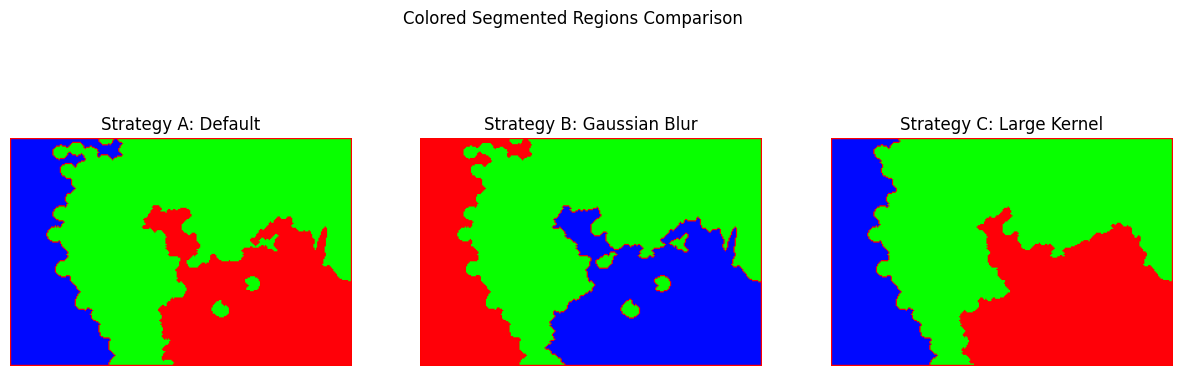

In [10]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.imshow(colored_A)
plt.title("Strategy A: Default")
plt.axis('off')

plt.subplot(1,3,2)
plt.imshow(colored_B)
plt.title("Strategy B: Gaussian Blur")
plt.axis('off')

plt.subplot(1,3,3)
plt.imshow(colored_C)
plt.title("Strategy C: Large Kernel")
plt.axis('off')

plt.suptitle('Colored Segmented Regions Comparison')
plt.show()


In [11]:
print("Number of segments in Strategy A:", len(np.unique(markers_A)) - 2)
print("Number of segments in Strategy B:", len(np.unique(markers_B)) - 2)
print("Number of segments in Strategy C:", len(np.unique(markers_C)) - 2)


Number of segments in Strategy A: 2
Number of segments in Strategy B: 2
Number of segments in Strategy C: 2
